In [8]:
import seaborn as sns


In [9]:
df = sns.load_dataset('anagrams')


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subidr  20 non-null     int64  
 1   attnr   20 non-null     object 
 2   num1    20 non-null     int64  
 3   num2    20 non-null     float64
 4   num3    20 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes


Zbiór danych jest pełny (nie ma żadnych brakujących wartości).


In [11]:
df


,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [12]:
df = df.drop('subidr', axis=1)
df


,attnr,num1,num2,num3
0,divided,2,4.0,7
1,divided,3,4.0,5
2,divided,3,5.0,6
3,divided,5,7.0,5
4,divided,4,5.0,8
5,divided,5,5.0,6
6,divided,5,4.5,6
7,divided,5,7.0,8
8,divided,2,3.0,7
9,divided,6,5.0,6


Niepotrzebna kolumna ('subidr') została usunięta.


In [13]:
# New value as sum of all 'num1', 'num2' and 'num3' columns
df['sum'] = df['num1'] + df['num2'] + df['num3']


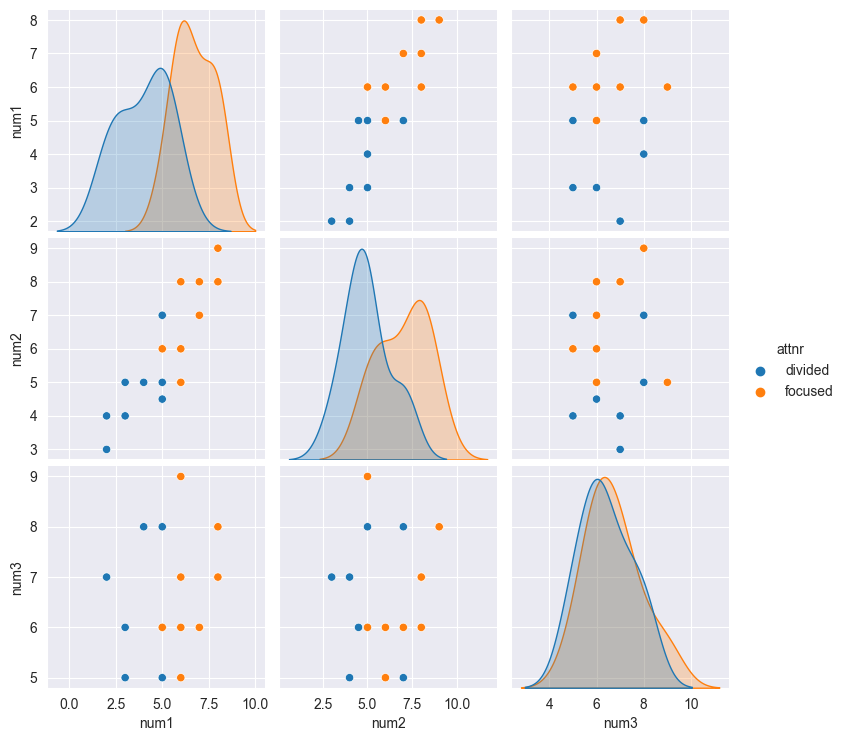

In [14]:
sns.set_style('darkgrid')
sns.pairplot(hue='attnr', data=df.drop('sum', axis=1))


Na wykresach powyżej widać, że dla attnr='divided' wartości num1, num2 są mniejsze niż dla attnr='focused'


In [15]:
only_numeric = df.loc[:, ['num1', 'num2', 'num3']]
only_numeric.describe()


,num1,num2,num3
count,20.000000,20.00000,20.000000
mean,5.350000,5.97500,6.550000
std,1.843195,1.67391,1.099043
min,2.000000,3.00000,5.000000
25%,4.750000,5.00000,6.000000
50%,5.500000,5.50000,6.000000
75%,6.250000,7.25000,7.000000
max,8.000000,9.00000,9.000000


<AxesSubplot:>

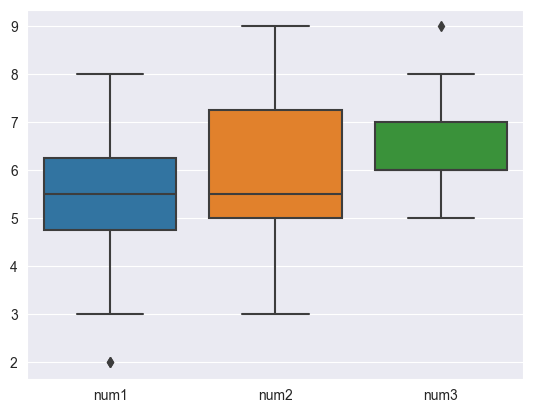

In [16]:
sns.set_style('darkgrid')
sns.boxplot(only_numeric)


Na wykresie powyżej widać, że num1 ma najmniejsze wartości. Num2 ma najszerszy odstęp międzykwartylowy, z kolei num3 ma najmniejszą warincję wartości, ale też największe wartości.


<AxesSubplot:xlabel='sum', ylabel='Count'>

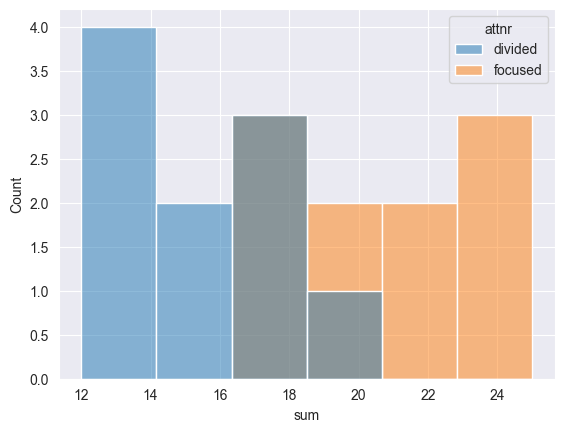

In [16]:
sns.histplot(x='sum', hue='attnr', data=df)


Na histogramie powyżej widać, ze niższe wartości sumy atrybutow num1, num2, num3 odpowiedają za attnr='divided', natomiast wyższe wartości tej sumy są dla attnr='focused'.


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(only_numeric, df['attnr'], stratify=df['attnr'])


In [24]:
model = KNeighborsClassifier()
model.fit(X_train, y_train);


In [27]:
model.score(X_test, y_test)


0.8

Model w 80% przypadków wybiera odpowiednie 'attnr'
